<h1><center>Homework 3</center></h1><br>

<div style="text-align: right"> Zenas Huang (or 黄傑倫) <br>
ID: 8806603551<br>
Fall 2019 <br>
ISE 529 - Predictive Analytics<br>
Wednesday, 5:00-7:50 PM<br>
 </div>

1. Consider fitting a logistic regression model to the iris dataset with all four features to predict the virginica class.

**a) Use pd.plotting.scatter_matrix() to create a scatter plot <font color='blue'>of the features</font>. The scatter plot should color the data points by the target variable category (setosa, versicolor, virginica). An example is shown in Blackboard.**

In [1]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
#convert to pandas dataframe
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names);

**Answer:**

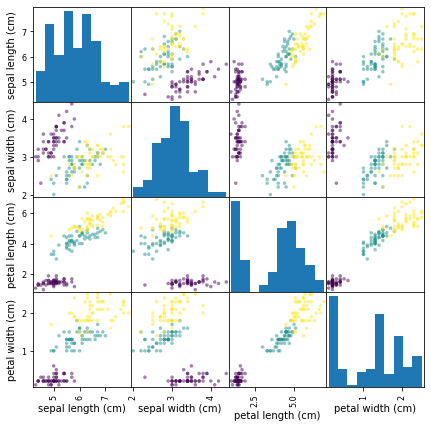

In [8]:
#Plot
pd.plotting.scatter_matrix(iris_df,c=iris.target,figsize=(7,7),s=50);

**b) Find the accuracy rate of performing LOOCV Cross Validation**

As done in class, we first fit a logistic regression onto the iris dataset to predict the virginica class:

In [9]:
#note that this is a categorical variable with 3 classes
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
#convert to dataframe
Y = iris['target']

In [11]:
dy = pd.DataFrame() #create an empty dataframe
#then include the column Y with the iris labels

In [12]:
dy['iris'] = Y

In [13]:
pd.value_counts(dy.iris)

2    50
1    50
0    50
Name: iris, dtype: int64

In [14]:
#collect the data into X
X = iris.data[:,0:5]

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.data[:6,0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [17]:
y = (iris['target']==2).astype(np.int)

In [18]:
#random state 42 is chosen arbitrarily
log_reg = LogisticRegression(solver='lbfgs',random_state=42)

In [19]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log_reg.intercept_

array([-14.43121671])

In [21]:
log_reg.coef_

array([[-0.39444787, -0.5133412 ,  2.93087523,  2.41709879]])

In [22]:
#Get Cross-Validation from libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [23]:
cv_method = LeaveOneOut()
measure = 'accuracy'

In [24]:
data = iris_df.copy()

In [25]:
predictors = data.values
virginica = y

In [26]:
y.shape

(150,)

In [27]:
predictors.shape

(150, 4)

In [28]:
mspe = cross_val_score(LogisticRegression(solver='lbfgs'),predictors,y,cv=cv_method,scoring=measure)
cvmspe1 = mspe.mean()
print(round(100*cvmspe1,2),'%')
#Using the measure='accuracy', we find that the accuracy score for this logistic regression
#on virginica prediction using all four features is:

97.33 %


**Answer:** The accuracy score for this logistic regression with all four features to predict the virginica class is 97.33%

**c) Find the accuracy rate of 5-fold cross validation when using (i) shuffle = True, and (ii) shuffle = False as the second argument in kfold = KFold(n_splits=5,shuffle=...,random_state=0)**

In [29]:
from sklearn.model_selection import KFold

In [30]:
# sub-part (i) select 5-fold cross validation with shuffle=True
cv_method = KFold(n_splits=5, shuffle=True,random_state=0)

In [31]:
measure = 'accuracy'

In [32]:
result1 = cross_val_score(LogisticRegression(solver='lbfgs'),predictors,y,cv=cv_method,scoring=measure)

In [33]:
cvmspe1_5fold_shuffletrue = result1.mean()
print(round(100*cvmspe1_5fold_shuffletrue,2),'%') #accuracy rate for the logistic regression using 5-fold regression

95.33 %


**Answer:** accuracy rate for the logistic regression using 5-fold regression with shuffling is 95.33%

In [34]:
cv_method = KFold(n_splits=5, shuffle=False,random_state=0)

In [35]:
measure = 'accuracy'

In [36]:
result2 = cross_val_score(LogisticRegression(solver='lbfgs'),predictors,y,cv=cv_method,scoring=measure)

In [37]:
cvmspe1_5fold_shufflefalse = result2.mean()
print(round(100*cvmspe1_5fold_shufflefalse,2),'%')

92.67 %


**Answer:** The accuracy rate for the logistic regression without shuffle is 92.67%

2. A local health clinic sent fliers to its clients to encourage everyone, but especially older persons at high risk of complications to get a flu shot in time for protection against an expected flu epidemic. In a pilot follow-up study, 159 clients were randomly selected and asked whether they actually received a flu shot. A client who received a flu shot was coded Y = 1, and a client who did not receive a flu shot was coded Y = 0. In addition. data were collected on their age (X1) and their health awareness. The latter data were combined into a health awareness index (X2), for which higher values indicate greater awareness. Also included in the data was client gender, where males were coded X3 = 1 and females were coded X3 = 0. Data set is available on blackboard as flushots.txt

**a.) Fit separate simple logistic regression models for predicting Y against each individual predictor. Write the fitted equation for each one.**

**Summarized Answer**: <br> Fitted Equations are summarized here, see below for the python commands used to obtain each.<br>
Using sklearn with the regularization argument set to C=1e9, we obtain the following fitted logistic regression equations for each predictor: <br>

yhat = 1/(1+exp(2.0794-0.6443*gender)) <br>
yhat = 1/(1+exp(8.7433-0.1087*age)) <br>
yhat = 1/(1+exp(-4.9113 + 0.1193*index)) <br>
<br>
As an alternative, we can also use the stats models library to fit the equations:
<br>
yhat = 1/(1+exp(2.0794-0.6444*gender)) <br>
yhat = 1/(1+exp(8.7433-0.1087*age)) <br>
yhat = 1/(1+exp(-4.9113 + 0.1193*index)) <br>

In [38]:
flushots = pd.read_csv('flushots.txt',delim_whitespace=True)

In [39]:
flushots.columns

Index(['shot', 'age', 'index', 'gender'], dtype='object')

In [40]:
flushots.head()

,shot,age,index,gender
0,0,59,52,0
1,0,61,55,1
2,1,82,51,0
3,0,51,70,0
4,0,53,70,0


In [41]:
#convert the target variable to numpy array
y = flushots['shot'].values.astype(np.int)

In [42]:
y.shape

(159,)

In [43]:
#convert predictors to numpy arrays to feed into sklearn.LogisticRegression()
age = flushots['age'].values.astype(np.int)
index = flushots['index'].values.astype(np.int)
gender = flushots['gender'].values.astype(np.int)

In [44]:
#reshape the predictors
age = age.reshape(-1,1)
index = index.reshape(-1,1)
gender = gender.reshape(-1,1)

In [45]:
log_reg = LogisticRegression(solver='lbfgs',C=1e9)
log_reg1 = LogisticRegression(solver='lbfgs',C=1e9)
log_reg2 = LogisticRegression(solver='lbfgs',C=1e9)

In [46]:
#shots logit regressed against age
logit_age = log_reg.fit(age,y)
#logit_age

In [47]:
logit_index = log_reg1.fit(index,y)
#logit_index

In [48]:
logit_gender = log_reg2.fit(gender,y)
#logit_gender

In [49]:
round(logit_gender.coef_[0][0],4)

0.6443

In [50]:
round(logit_gender.intercept_[0],4)

-2.0794

Sklearn Logistic Fitted Equation of shots on gender:<br>
yhat = 1/(1+exp(2.0794-0.6443*gender))

In [51]:
round(logit_age.coef_[0][0],4)

0.1087

In [52]:
round(logit_age.intercept_[0],4)

-8.7433

Sklearn logistic fitted equation of shot on age: <br>
yhat = 1/(1+exp(8.7433-0.1087*age))

In [53]:
round(logit_index.coef_[0][0],4)

-0.1193

In [54]:
round(logit_index.intercept_[0],4)

4.9114

Sklearn logistic Fitted Equation of shot on index (aka health awareness index):<br>
yhat = 1/(1+exp(-4.9114+0.1193*index))

In [55]:
#Using Statsmodels GLM families binomial
import statsmodels.api as sm

In [56]:
sm_age = flushots['age'].values
sm_index = flushots['index'].values
sm_gender = flushots['gender'].values

In [57]:
shot = flushots.values[:,0]

In [58]:
sm_age1 = sm.add_constant(sm_age)
sm_index1 = sm.add_constant(sm_index)
sm_gender1 = sm.add_constant(sm_gender)

In [59]:
model_glm_age = sm.GLM(shot, sm_age1,family=sm.families.Binomial()).fit()
model_glm_age.params

array([-8.74325968,  0.10873664])

statsmodels logistic regression of flushot on age: <br>
yhat = 1/(1+exp(8.7433-0.1087*age))

In [60]:
model_glm_index = sm.GLM(shot, sm_index1,family=sm.families.Binomial()).fit()
model_glm_index.params

array([ 4.91132853, -0.11930928])

statsmodels logistic regression of flushot on index (aka health awareness index):<br>
yhat = 1/(1+exp(-4.9113 + 0.1193*index))

In [61]:
model_glm_gender = sm.GLM(shot, sm_gender1,family=sm.families.Binomial()).fit()
model_glm_gender.params

array([-2.07944154,  0.64435702])

In [62]:
model_glm_gender.fittedvalues[:5]

array([0.11111111, 0.19230769, 0.11111111, 0.11111111, 0.11111111])

statsmodels logistic regression of flushot on gender: <br>
yhat = 1/(1+exp(2.0794-0.6444*gender))

**2 b) For each model find the probability that male clients aged 55 with a health awareness index of 60 will receive a flu shot.**

***Summarized Answer:***<br>
-Using the age logistic regression model, the probability of gettting a shot
if one is 55 years old is 0.059371 or approximately 6%.<br>
-Using the Index Logistic Regression, a person with awareness index of 60 has a .0955 or 9.55% probability of getting a flu shot.<br>
-Usingthe logistic regression on gender, if a person is male (gender ==1), then they have a 0.1923 or 19.23% probability that they will get a flushot.

In [63]:
flushots1 = flushots.copy()

In [64]:
model_glm_age.predict(sm_age1)[:5]

array([0.08884678, 0.10809737, 0.54317842, 0.03925271, 0.04832762])

In [65]:
shotprob = model_glm_age.predict(sm_age1)

In [66]:
flushots1['age fittedvalues'] = model_glm_age.fittedvalues

In [67]:
flushots1['age resid_response'] = model_glm_age.resid_response

In [68]:
shothat_age = shotprob.copy()

In [69]:
shothat_age[shothat_age>0.5] =1
shothat_age[shothat_age<0.5] = 0
shothat_age = shothat_age.astype(int)

In [70]:
flushots1['shothat_age'] = shothat_age #add col with age-based logistic predictions
flushots1[:5]

,shot,age,index,gender,age fittedvalues,age resid_response,shothat_age
0,0,59,52,0,0.088847,-0.088847,0
1,0,61,55,1,0.108097,-0.108097,0
2,1,82,51,0,0.543178,0.456822,1
3,0,51,70,0,0.039253,-0.039253,0
4,0,53,70,0,0.048328,-0.048328,0


In [71]:
#get prediction errors for age logistic regression 
flushots1[flushots1['shot'] != flushots1['shothat_age']].count()
#there are 25 failed predictions with this model

shot                  25
age                   25
index                 25
gender                25
age fittedvalues      25
age resid_response    25
shothat_age           25
dtype: int64

In [72]:
n = len(shot)
25/n #prediction error rate for age logistic regression is 15.7%

0.15723270440251572

In [73]:
round(flushots1[flushots['age']==55]['age fittedvalues'].mean(),4)

0.0594

In [74]:
age_pred = model_glm_age.predict([1,55])
round(age_pred[0],4) #probability of flushot, given gender is man.

0.0594

**Answer:** Using the age logistic regression model, the probability of gettting a shot
if one is 55 years old is 0.059371 or approximately 6%

In [75]:
flushots2 = flushots.copy()

In [76]:
model_glm_index.predict(sm_index1)[:5]

array([0.21538707, 0.16101685, 0.23623294, 0.03105883, 0.03105883])

In [77]:
flushots2['index fittedvalues'] = model_glm_index.fittedvalues

In [78]:
flushots2['index resid_response'] = model_glm_index.resid_response

In [79]:
shotprob = model_glm_index.predict(sm_index1)
shothat_index = shotprob.copy()

shothat_index[shothat_index>0.5] =1
shothat_index[shothat_index<0.5] = 0
shothat_index = shothat_index.astype(int)

In [80]:
flushots2['shothat_index'] = shothat_index #add col with index-based logit predictions
flushots2[:5]

,shot,age,index,gender,index fittedvalues,index resid_response,shothat_index
0,0,59,52,0,0.215387,-0.215387,0
1,0,61,55,1,0.161017,-0.161017,0
2,1,82,51,0,0.236233,0.763767,0
3,0,51,70,0,0.031059,-0.031059,0
4,0,53,70,0,0.031059,-0.031059,0


In [81]:
#get prediction errors for logistic regression on index
flushots2[flushots2['shot'] != flushots2['shothat_index']].count()
#there are 23 wrong predictions with this model

shot                    23
age                     23
index                   23
gender                  23
index fittedvalues      23
index resid_response    23
shothat_index           23
dtype: int64

In [82]:
n = len(shot)
23/n #prediction error rate for awareness index logistic regression is 14.5%

0.14465408805031446

In [83]:
#get prediction for index value 60
round(flushots2[flushots2['index']==60]['index fittedvalues'].mean(),4)

0.0956

In [84]:
index_pred = model_glm_index.predict([1,60])
round(index_pred[0],4) #probability of flushot, given gender is man.

0.0956

**Answer:** Using the Index Logistic Regression, a person with awareness index of 60 has a .0955 or 9.6% chance of getting a flu shot. 

In [85]:
flushots3 = flushots.copy()

In [86]:
model_glm_gender.predict(sm_gender1)[:5]

array([0.11111111, 0.19230769, 0.11111111, 0.11111111, 0.11111111])

In [87]:
flushots3['gender fittedvalues'] = model_glm_gender.fittedvalues

In [88]:
flushots3['gender resid_response']= model_glm_gender.resid_response

In [89]:
shotprob = model_glm_gender.predict(sm_gender1)
shothat_gender = shotprob.copy()

shothat_gender[shothat_gender>0.5] =1
shothat_gender[shothat_gender<0.5] = 0
shothat_gender = shothat_gender.astype(int)

In [90]:
flushots3['shothat_gender'] = shothat_gender #add col with index-based logit predictions
flushots3[:2]

,shot,age,index,gender,gender fittedvalues,gender resid_response,shothat_gender
0,0,59,52,0,0.111111,-0.111111,0
1,0,61,55,1,0.192308,-0.192308,0


In [91]:
#get prediction errors for logistic regression on index
flushots3[flushots3['shot'] != flushots3['shothat_gender']].count()
#there are 24 prediction errors with this model

shot                     24
age                      24
index                    24
gender                   24
gender fittedvalues      24
gender resid_response    24
shothat_gender           24
dtype: int64

In [92]:
n = len(shot)
24/n
#error rate for gender logistic regression is 15.1%

0.1509433962264151

In [93]:
round(flushots3[flushots3['gender'] ==1]['gender fittedvalues'].mean(),4)

0.1923

In [94]:
gender_pred = model_glm_gender.predict([1,1])
round(gender_pred[0],4) #probability of flushot, given gender is man.

0.1923

**Answer:** Given that one's gender is male (gender = 1), then according to the logistic regression on gender, there will be a 0.192 or 19.2% probability that they will get a flushot.

***c.) Which model fits best, which one predicts best? why?***


***Summarized Answer:***

<font color='blue'>Best fit:</font> Index Logistic Regression Model.<br>
<font color='blue'>Best Predictions:</font> Index Logistic Regression model.<br><br>
<font color='blue'>Why:</font><br>
Index logistic regression has the lowest AIC, so it is the best fitting model.
Index logistic regression also has the smallest deviance of all 3 logistic models, so it is the best fitting model. 
From the previous error rate counts on the whole data set, Index logistic regression has the smallest error rate of the three models at 14.5%, so Index logistic regression is the best fitting model.

Among the three models, Index logistic regression has the highest accuracy score of 85.5% from the sklearn cross_val_score using the 5-folds, the Index Logistic Regression is the best predicting model.

We can verify this by using the Validation approach with the crosstab matrix on the equivalent statsmodels logistic regression models with a 70-30 training-to-test data split. In this approach we find that the Gender Logistic Regression yields a prediction error rate of 10.42%, Age Logistic Regression gives a prediction error rate of 14.58%, and Index Logistic Regression has a prediction error rate of 8.33%.

Therefore, using both crosstab validation and the sklearn Index Logistic Regression predicts the best using the predictive validation approach. This result of Index Logistic Regression as the best predicting model is consistent with our answer using sklearn's cross_val_score method scoring the accuracy with a 5-fold test.

In [95]:
print("Age logistic regression deviance:", model_glm_age.deviance)
print("Age logistic regression null deviance:",model_glm_age.null_deviance)
print("Age logistic regression AIC:", model_glm_age.aic)
print('\n')
print("Index logistic regression deviance:", model_glm_index.deviance)
print("Index logistic regression null deviance:", model_glm_index.null_deviance)
print("Index logistic regression AIC:", model_glm_index.aic)
print('\n')
print("Gender logistic regression deviance:", model_glm_gender.deviance)
print("Gender logistic regression null deviance:", model_glm_gender.null_deviance)
print("Gender logistic regression AIC:",model_glm_gender.aic)

Age logistic regression deviance: 116.26695826327159
Age logistic regression null deviance: 134.94076227095624
Age logistic regression AIC: 120.26695826327158


Index logistic regression deviance: 113.19579725936082
Index logistic regression null deviance: 134.94076227095624
Index logistic regression AIC: 117.19579725936083


Gender logistic regression deviance: 132.88089493174806
Gender logistic regression null deviance: 134.94076227095624
Gender logistic regression AIC: 136.88089493174806


**Answer:** Index logistic regression has the lowest AIC, so it is the best fitting model.
Index logistic regression also has the smallest deviance of all 3 logistic models, so it is the best fitting model. 
From the previous error rate counts on the whole data set, Index logistic regression has the smallest error rate of the three models at 14.5%, so Index logistic regression is the best fitting model.

To find the best predicting model, we can use the cvmspe score within out sklearn logistic regressions and pick the one that yields the highest accuracy score

In [96]:
measure ='accuracy'

In [97]:
cv = 5

In [98]:
result_age = cross_val_score(LogisticRegression(solver='lbfgs', C=1e9),age,y,cv=cv_method,scoring=measure)

In [99]:
result_gender = cross_val_score(LogisticRegression(solver='lbfgs',C=1e9), gender,y,cv=cv_method,scoring=measure)

In [100]:
result_index = cross_val_score(LogisticRegression(solver='lbfgs',C=1e9),index,y,cv=cv_method,scoring=measure)

In [101]:
print('age_logistic accuracy score:',result_age.mean())
print('gender_logistic accuracy score:',result_gender.mean())
print('index_logistic accuracy score:',result_index.mean())

age_logistic accuracy score: 0.842741935483871
gender_logistic accuracy score: 0.8491935483870968
index_logistic accuracy score: 0.8558467741935484


**Answer:** Since index logistic regression has the highest accuracy score from the sklearn cross_val_score, the Index Logistic Regression is the best predicting model.

An alternative approach we can take to finding the best predicting model is by using the validation approach on the stats models regressions. We will use a standard industry convention of 70-30 (training-test) data set split.

In [102]:
#n = 159
0.7*n
#so using 70/30 split gives us 111 training, 48 test
159 - 111

48

In [103]:
np.random.seed(1)

In [104]:
rows = np.random.choice(159,111, replace=False)
rows

array([ 29,  42,  14,  91,  81,  19,  44,  11,  40,  97,  89,  94,  73,
       105,  59,  90,  66,  54, 108, 100, 153,  35,  51,   5,  84,  31,
        16, 145, 143,  93, 127, 103, 111, 131,  58, 102,  47,  69,  33,
        56, 132, 110, 106, 154,  12, 114,  75,  28,  53, 117, 136,  17,
        77, 157,  13,  78,  18,  48,  92,   4,  45, 141,  39,  36, 126,
       147, 151, 146, 122,   2, 123, 112,   6,   0, 119,  65,  55,  85,
        88,  46,  62,  74, 125,  99, 107,  95,  10,  34,  32, 130,  38,
        83, 120, 158,  27,  23,  67,   9, 135, 104, 116, 138,  87,  98,
       148, 118,  64,  15,  82,  41, 109])

In [105]:
flushots_val = flushots.copy()

In [106]:
data_train = flushots_val.loc[rows]
data_test = flushots_val.drop(rows)

In [107]:
#test features and target
shot_test = data_test.shot
index_test = data_test['index'].values.astype(np.int)
age_test = data_test['age'].values.astype(np.int)
gender_test = data_test['gender'].values.astype(np.int)

In [108]:
#train features and target
shot_train = data_train.shot
index_train = data_train['index'].values
age_train = data_train['age'].values
gender_train = data_train['gender'].values 

In [109]:
#first fit the train model on age, then predict the test set response.
model_val_age = sm.GLM(shot_train,sm.add_constant(age_train),family = sm.families.Binomial()).fit()
#fit the train model on index, then predict the test set response.
model_val_index = sm.GLM(shot_train,sm.add_constant(index_train),family = sm.families.Binomial()).fit()
#fit the train model on gender, then predict the test set response.
model_val_gender = sm.GLM(shot_train,sm.add_constant(gender_train),family=sm.families.Binomial()).fit()


In [110]:
#make the predictions for each model using the test set data.
yhat_age = model_val_age.predict(sm.add_constant(age_test))
yhat_index = model_val_index.predict(sm.add_constant(index_test))
yhat_gender = model_val_gender.predict(sm.add_constant(gender_test))

In [111]:
yhat_age[yhat_age>0.5] = 1
yhat_age[yhat_age<0.5] = 0

yhat_index[yhat_index>0.5] = 1
yhat_index[yhat_index<0.5] = 0

yhat_gender[yhat_gender>0.5] = 1
yhat_gender[yhat_gender<0.5] = 0

In [112]:
df_age = pd.DataFrame()
df_age['Success'] = shot_test
df_age['age_prediction'] = yhat_age.astype(int)
df_age[:4]

,Success,age_prediction
1,0,0
3,0,0
7,0,0
8,0,0


In [113]:
m = len(df_age)
m

48

In [114]:
pd.crosstab(df_age.age_prediction,df_age.Success)

Success,0,1
age_prediction,,
0,41,5
1,2,0


In [115]:
#using stats models predictive validation approach, the 
#prediction error rate on age logistic regression is
print(round(100*7/m,2),'%')

14.58 %


In [116]:
df_index = pd.DataFrame()
df_index['Success'] = shot_test
df_index['index_prediction'] = yhat_index.astype(int)
df_index[:3]

,Success,index_prediction
1,0,0
3,0,0
7,0,0


In [117]:
m1 = len(df_index)
m1

48

In [118]:
pd.crosstab(df_index.index_prediction, df_index.Success)

Success,0,1
index_prediction,,
0,43,4
1,0,1


In [119]:
#prediction error rate for awareness index logistic regression is
print(round(100*4/m1,2),'%')

8.33 %


In [120]:
df_gender = pd.DataFrame()
df_gender['Success'] = shot_test
df_gender['gender_prediction'] = yhat_gender.astype(int)
df_gender[:3]

,Success,gender_prediction
1,0,0
3,0,0
7,0,0


In [121]:
m3 = len(df_gender)
m3

48

In [122]:
pd.crosstab(df_gender.gender_prediction, df_gender.Success)

Success,0,1
gender_prediction,,
0,43,5


In [123]:
#error rate using gender logistic regression is
print(round(100*5/m3,2),'%')

10.42 %


**Answer:**<br> Using the Validation approach with the crosstab matrix, we find that the gender Logistic Regression gives us a prediction error rate of 10.42%, Age Logistic Regression gives us a prediction error rate of 14.58%, and Index Logistic Regression has a prediction error rate of 8.33%.

Therefore, Index Logistic Regression predicts the best using the predictive validation approach. This result of Index Logistic Regression as the best predicting model is consistent with our answer using sklearn's cross_val_score method scoring the accuracy with a 5-fold test.

**2d) Plot fitted equation and scatterplot for model with predictor age. Separately, plot fitted equation and scatterplot for model with predictor health index.**


***Answer:***

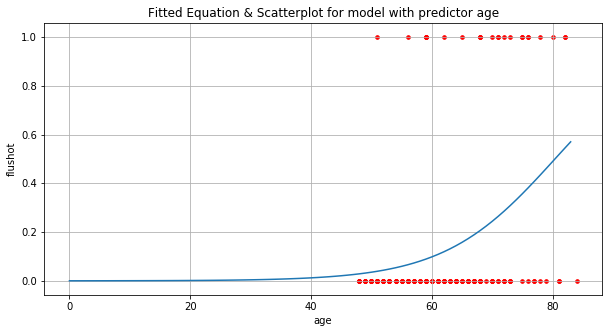

In [124]:
xaxis_age = range(np.max(age))
yaxis_age = model_glm_age.predict(sm.add_constant(xaxis_age))
plt.figure(figsize=(10,5))
plt.scatter(age,shot,s=13,c='r')
plt.plot(xaxis_age,yaxis_age)
plt.title("Fitted Equation & Scatterplot for model with predictor age")
plt.xlabel('age')
plt.ylabel('flushot')
plt.grid()

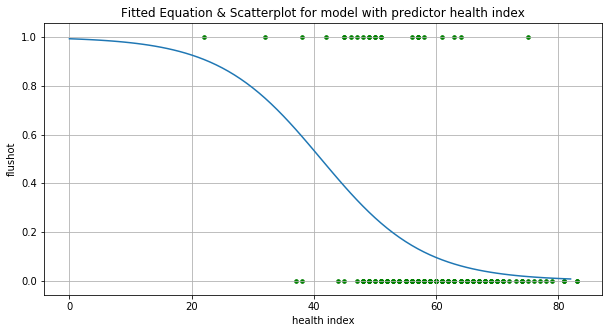

In [125]:
xaxis_index = range(np.max(index))
yaxis_index = model_glm_index.predict(sm.add_constant(xaxis_index))
plt.figure(figsize=(10,5))
plt.scatter(index,shot,s=13,c='g')
plt.plot(xaxis_index,yaxis_index)
plt.title("Fitted Equation & Scatterplot for model with predictor health index")
plt.xlabel('health index')
plt.ylabel('flushot')
plt.grid()

3. (non-computational)
A logistic regression model is fitted. It is found that b0 = −25 and b1 = 0.20.

***a.) Write the fitted equation***

The fitted equation is yhat = 1/(1+exp(25-0.20*x))

***b.) For what value of X is the mean response equal to 0.50?***

Substituting yhat = 0.50 gives us the equation 0.5*(1+exp(25-0.20*x)) = 1. Then by backsolving we can find that
<font color='blue'>X = 125</font> gives the desired mean response value.

***c.) Find the ratio of the odds when X = 160 to that when X = 150.***

So let odds_160 = exp(-25+0.2*(160)) and odds_150 = exp(-25+0.2*(150)), then we can solve this by calculator or use python's calculator functionality to find:

In [126]:
odds_160 = math.exp(-25+0.2*(160))
odds_150 = math.exp(-25+0.2*(150))
print("The Odds when X = 160 are ",odds_160)
print("The Odds when X = 150 are ", odds_150)

The Odds when X = 160 are  1096.6331584284585
The Odds when X = 150 are  148.4131591025766


In [127]:
round(odds_160/odds_150,4)

7.3891

In [128]:
#we can verify this by noting that
round(math.exp(0.2*(160-150)),4) 
#also gives us the same odds ratio or odds delta

7.3891

**Answer:** Then their ratio is: Odds_160/Odds_150 = 7.3891